In [1]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\StatenIsland.csv",error_bad_lines=False)
df = df.compute()

In [3]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df["Resolution Description"]= df["Resolution Description"].astype(str)
df["Descriptor"]= df["Descriptor"].astype(str) 

df['Descriptor'] = df['Descriptor'].apply(to_lower)
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
df['Descriptor']= df['Descriptor'].apply(porter.stem)
df['Resolution Description'] = df['Resolution Description'].apply(to_lower)
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)
df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

In [5]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

In [6]:
df.head()

Unique Key         Created Date          Closed Date Agency  \
0    27842655  2014-04-14 14:42:00  2014-08-20 10:55:00    DEP   
1    27842660  2014-04-14 12:51:00  2014-04-14 14:15:00    DEP   
2    27842665  2014-04-14 21:11:00  2014-04-17 13:00:00    DEP   
3    27842671  2014-04-14 12:29:00  2014-04-14 19:10:00    DEP   
4    27842675  2014-04-14 11:59:00  2014-04-14 12:30:00    DEP   

                              Agency Name Complaint Type  \
0  Department of Environmental Protection   Water System   
1  Department of Environmental Protection          Sewer   
2  Department of Environmental Protection   Water System   
3  Department of Environmental Protection   Water System   
4  Department of Environmental Protection   Water System   

                     Descriptor Location Type  Incident Zip  \
0      defective street cut wzz           nan         10303   
1  sewer backup use comments sa           nan         10301   
2                 dirty water w           nan         10301   
3                 dirty water w           nan         10312   
4          leak use comments wa           nan         10304   

        Incident Address  ... Park Facility Name   Park Borough   Latitude  \
0  2560 RICHMOND TERRACE  ...        Unspecified  STATEN ISLAND  40.637646   
1    128 BENZIGER AVENUE  ...        Unspecified  STATEN ISLAND  40.639771   
2      75 MERRICK AVENUE  ...        Unspecified  STATEN ISLAND  40.601326   
3      57 BLUEBERRY LANE  ...        Unspecified  STATEN ISLAND  40.529274   
4                    NaN  ...        Unspecified  STATEN ISLAND  40.591023   

   Longitude                                 Location Total_Time  \
0 -74.146516  (40.63764599489574, -74.14651579795446)      127.0   
1 -74.083032  (40.63977069540825, -74.08303207959038)        0.0   
2 -74.110605  (40.60132585651279, -74.11060489240582)        2.0   
3 -74.159861  (40.52927425906048, -74.15986143974995)        0.0   
4 -74.100909  (40.59102256401196, -74.10090949721042)        0.0   

  Resolution_Time  Year Month  DayofWeek  
0           127.0  2014     4          0  
1             0.0  2014     4          0  
2             2.0  2014     4          0  
3             0.0  2014     4          0  
4             0.0  2014     4          0  

[5 rows x 34 columns]

In [7]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)
df['Complaint Type'] = df['Complaint Type'].apply(to_lower)
df[['Complaint Type','Descriptor','Resolution Description']].head()

Complaint Type                    Descriptor  \
0   water system      defective street cut wzz   
1          sewer  sewer backup use comments sa   
2   water system                 dirty water w   
3   water system                 dirty water w   
4   water system          leak use comments wa   

                              Resolution Description  
0  department environment protection inspected co...  
1  department environmental protection investigat...  
2  department environmental protection determined...  
3  department environment protection inspected co...  
4  department environmental protection determined...

#### Target Variable Rephrasing

In [8]:
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique(),'HeatComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique(), 'NoiseComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique(),'Construction/PlumbingComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique(),'DOFComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique(),'ParkingComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique(),'Paint/PlasterComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique(),'WaterComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique(),'SanitationComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique(),'HighwayComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique(),'SewerComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique(),'HomelessComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')
pd.set_option('display.max_rows', None)
df['Complaint Type'].value_counts()
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [9]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')
df['Complaint Type'].value_counts()

StreetComplaints                       265560
Other Complaints                       111925
NoiseComplaints                         91036
ParkingComplaints                       86195
WaterComplaints                         69444
SanitationComplaints                    54142
missed collection all materials         47552
SewerComplaints                         43302
Construction/PlumbingComplaints         38996
request large bulky item collection     25535
BuildingComplaints                      24817
TrafficComplaints                       19198
HeatComplaints                          18087
rodent                                  13496
Paint/PlasterComplaints                  9845
electric                                 6232
consumer complaint                       5180
nonconst                                 3668
HighwayComplaints                        2560
air quality                              2518
broken muni meter                        2421
food establishment                

#### Location Type Rephrasing

In [10]:
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("residential") ]["Location Type"].unique(),'RESIDENTIAL')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("school") ]["Location Type"].unique(),'SCHOOL')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique(),'APARTMENT')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique(),'COMMERCIAL')
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique(),'RESTAURANT')


In [11]:
df['Location Type'].value_counts()

nan                                   303669
sidewalk                              175370
RESIDENTIAL                           145981
street                                135026
streetsidewalk                        128110
12 family dwelling                     13202
lot                                    10635
RESTAURANT                              7400
COMMERCIAL                              6140
PARK                                    3236
highway                                 2677
streetcurbside                          2017
other explain below                     1702
property address                        1336
3 family apt building                   1335
vacant lot                              1235
other                                   1186
bus stop shelter                        1068
APARTMENT                               1041
SCHOOL                                   873
mixed use                                452
publicunfenced area                      441
vacant bui

#### Status

In [12]:
df.loc[((df['Status']!='Closed') & (df['Year'] == 2012) 
       & (df['Resolution Description'].str.contains("investigated|submitted|reviewed|inspected"))) , "Status"] = "Closed"

In [13]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

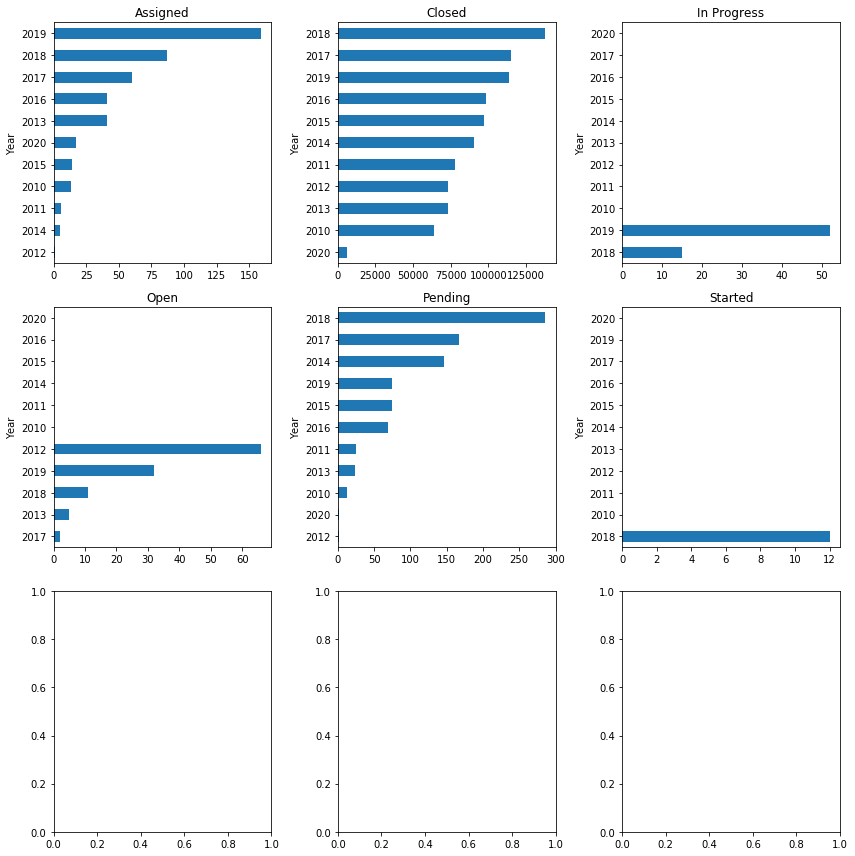

In [14]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [15]:
df = df[df['Location Type']!='nan']
df = df[df['Resolution Description']!='nan']

In [16]:
df1 = df[['Agency','Location Type','Complaint Type','Descriptor','Resolution_Time','Total_Time','Year','Month','DayofWeek','Status','Resolution Description']]

In [17]:
df1.shape

(618496, 11)

In [18]:
#df_model = df1.head(60000)

In [19]:
df_model = df1

In [20]:
df_model.head()

Agency       Location Type    Complaint Type                 Descriptor  \
12    HPD         RESIDENTIAL  Other Complaints    garbagerecycling storag   
13    HPD         RESIDENTIAL  Other Complaints                       pest   
14    HPD         RESIDENTIAL  Other Complaints           electricgas rang   
15  DOHMH  12 family dwelling            rodent   condition attracting rod   
18  DOHMH  12 family dwelling   WaterComplaints  swimming pool  unmaintain   

    Resolution_Time  Total_Time  Year  Month  DayofWeek  Status  \
12             14.0        14.0  2014      4          0  Closed   
13             11.0        11.0  2014      4          0  Closed   
14             10.0        10.0  2014      4          0  Closed   
15              9.0         9.0  2014      4          0  Closed   
18             14.0        15.0  2014      4          0  Closed   

                               Resolution Description  
12  department housing preservation development in...  
13  department housing preservation development in...  
14  department housing preservation development in...  
15  department health mental hygiene review compla...  
18  department health mental hygiene review servic...

### Create a new column 'category_id' with encoded Complaint Types

In [21]:
df_model['complaint_id'] = df_model['Complaint Type'].factorize()[0]
complaint_id_df = df_model[['Complaint Type', 'complaint_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(complaint_id_df.values)
id_to_category = dict(complaint_id_df[['complaint_id', 'Complaint Type']].values)

# New dataframe
df_model.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Agency       Location Type    Complaint Type                 Descriptor  \
12    HPD         RESIDENTIAL  Other Complaints    garbagerecycling storag   
13    HPD         RESIDENTIAL  Other Complaints                       pest   
14    HPD         RESIDENTIAL  Other Complaints           electricgas rang   
15  DOHMH  12 family dwelling            rodent   condition attracting rod   
18  DOHMH  12 family dwelling   WaterComplaints  swimming pool  unmaintain   

    Resolution_Time  Total_Time  Year  Month  DayofWeek  Status  \
12             14.0        14.0  2014      4          0  Closed   
13             11.0        11.0  2014      4          0  Closed   
14             10.0        10.0  2014      4          0  Closed   
15              9.0         9.0  2014      4          0  Closed   
18             14.0        15.0  2014      4          0  Closed   

                               Resolution Description  complaint_id  
12  department housing preservation development in...             0  
13  department housing preservation development in...             0  
14  department housing preservation development in...             0  
15  department health mental hygiene review compla...             1  
18  department health mental hygiene review servic...             2

### Text Preprocessing

In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [23]:
df_model.head()

Agency       Location Type    Complaint Type                 Descriptor  \
12    HPD         RESIDENTIAL  Other Complaints    garbagerecycling storag   
13    HPD         RESIDENTIAL  Other Complaints                       pest   
14    HPD         RESIDENTIAL  Other Complaints           electricgas rang   
15  DOHMH  12 family dwelling            rodent   condition attracting rod   
18  DOHMH  12 family dwelling   WaterComplaints  swimming pool  unmaintain   

    Resolution_Time  Total_Time  Year  Month  DayofWeek  Status  \
12             14.0        14.0  2014      4          0  Closed   
13             11.0        11.0  2014      4          0  Closed   
14             10.0        10.0  2014      4          0  Closed   
15              9.0         9.0  2014      4          0  Closed   
18             14.0        15.0  2014      4          0  Closed   

                               Resolution Description  complaint_id  
12  department housing preservation development in...             0  
13  department housing preservation development in...             0  
14  department housing preservation development in...             0  
15  department health mental hygiene review compla...             1  
18  department health mental hygiene review servic...             2

### TFIDF

In [24]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df_model['Descriptor']).toarray()

labels = df_model.complaint_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 618496 complaints is represented by 1001 features (TF-IDF score of unigrams and bigrams)


In [25]:
 #Finding the three most correlated terms with each of the complaint categories
N = 3
for Product, complaint_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == complaint_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> BuildingComplaints:
  * Most Correlated Unigrams are: fram, door, floor
  * Most Correlated Bigrams are: door fram, window pan, window fram

==> Construction/PlumbingComplaints:
  * Most Correlated Unigrams are: toilet, waterleak, basinsink
  * Most Correlated Bigrams are: window guard, steam piperis, water suppli

==> DOFComplaints:
  * Most Correlated Unigrams are: info, statu, refundcredit
  * Most Correlated Bigrams are: payment post, refundcredit info, info statu

==> HeatComplaints:
  * Most Correlated Unigrams are: build, heat, apart
  * Most Correlated Bigrams are: loud musicparti, heat rel, entire build

==> HighwayComplaints:
  * Most Correlated Unigrams are: linemark, pothole, highway
  * Most Correlated Bigrams are: graffiti highway, painted linemark, pothole highway

==> HomelessComplaints:
  * Most Correlated Unigrams are: musicparti, loud, nan
  * Most Correlated Bigrams are: missed collect, license pl, loud musicparti

==> NoiseComplaints:
  * Most Correlated Unigr

In [26]:
X = df_model[['Agency','Location Type','Descriptor','Resolution_Time','Total_Time','Year','Month','DayofWeek','Status','Resolution Description']] # Collection of documents
y = df_model['Complaint Type'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [27]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [28]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                               
LinearSVC                    0.979998            0.005381
MultinomialNB                0.972155            0.008648
RandomForestClassifier       0.573092            0.050144

#### Model Evaluation

In [29]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_model.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
# Classification report
from sklearn import metrics
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df_model['Complaint Type'].unique()))

				CLASSIFICATIION METRICS

                                 precision    recall  f1-score   support

               Other Complaints       0.96      0.99      0.98     24398
                         rodent       1.00      1.00      1.00      3130
                WaterComplaints       0.95      1.00      0.98      1775
           SanitationComplaints       0.99      1.00      0.99     13535
                       electric       0.98      0.97      0.97      1545
             BuildingComplaints       0.71      1.00      0.83      1792
                 HeatComplaints       1.00      1.00      1.00      4467
                        general       0.71      0.94      0.81       578
        Paint/PlasterComplaints       1.00      0.99      0.99      2448
missed collection all materials       1.00      1.00      1.00     11558
               StreetComplaints       1.00      1.00      1.00     40684
Construction/PlumbingComplaints       0.99      0.72      0.83      5061
              Parking

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


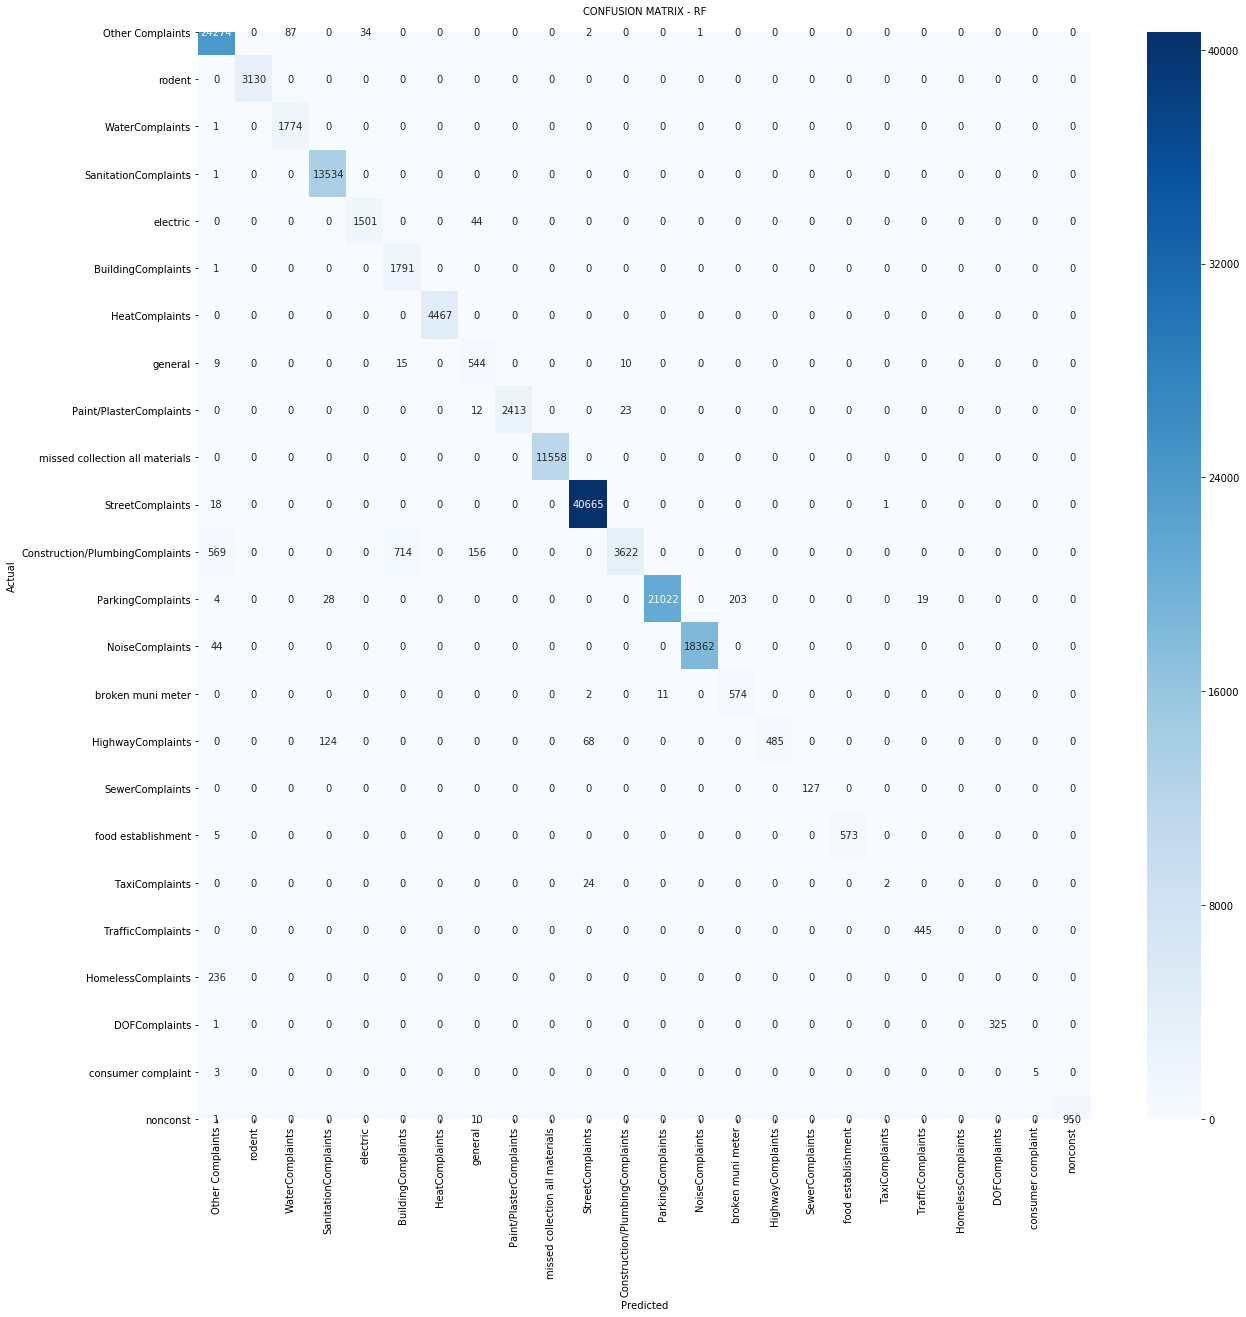

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=complaint_id_df['Complaint Type'].values, 
            yticklabels=complaint_id_df['Complaint Type'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RF\n", size=10);

### Seeing what complaints are classified different

In [44]:
for predicted in complaint_id_df.complaint_id:
    for actual in complaint_id_df.complaint_id:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
            display(df_model.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Complaint Type','Descriptor','Resolution Description']])
            print('')

'Construction/PlumbingComplaints' predicted as 'Other Complaints' : 569 examples.


Complaint Type                       Descriptor  \
23332                            rodent         condition attracting rod   
23332                  StreetComplaints             failed street repair   
23332   Construction/PlumbingComplaints                             mold   
57095   missed collection all materials                   missed collect   
57095                  Other Complaints                      broken curb   
57095                 ParkingComplaints        commercial overnight park   
57095   Construction/PlumbingComplaints                             mold   
57095                    HeatComplaints                             heat   
74187                            rodent                        rat sight   
74187   missed collection all materials                   missed collect   
74187                   NoiseComplaints                     bangingpound   
74187                 ParkingComplaints                 blocked sidewalk   
74187                 ParkingComplaints                   partial access   
74187   Construction/PlumbingComplaints                             mold   
74187                BuildingComplaints                        door fram   
46537   missed collection all materials        r bulkmissed recy collect   
46537                  Other Complaints                              nan   
46537                    HeatComplaints                            apart   
46537                 ParkingComplaints                           access   
46537   Construction/PlumbingComplaints                             mold   
56236              SanitationComplaints                 e dirty sidewalk   
56236                   NoiseComplaints                        loud talk   
56236                  StreetComplaints                       license pl   
56236                  StreetComplaints             failed street repair   
56236   Construction/PlumbingComplaints                             mold   
56236   missed collection all materials           c uncollected xmas tre   
41384                  Other Complaints               recycling electron   
41384   missed collection all materials          rg missed recycling pap   
41384                    HeatComplaints                            apart   
41384                 ParkingComplaints                 blocked sidewalk   
41384                     DOFComplaints          refundcredit info statu   
41384   Construction/PlumbingComplaints                        waterleak   
41384   Construction/PlumbingComplaints                             mold   
41885                    HeatComplaints                     entire build   
41885                  StreetComplaints          trees sidewalks program   
41885                  Other Complaints               recycling electron   
41885                 ParkingComplaints        commercial overnight park   
41885           Paint/PlasterComplaints                             ceil   
41885   Construction/PlumbingComplaints                             mold   
63908                   NoiseComplaints                  loud musicparti   
63908                  Other Complaints                 electricgas rang   
63908                   NoiseComplaints                  loud musicparti   
63908                   NoiseComplaints                       engine idl   
63908                 ParkingComplaints        commercial overnight park   
63908   Construction/PlumbingComplaints                             mold   
59281              SanitationComplaints        street conddumpoutdropoff   
59281   missed collection all materials     r missed recyclingall materi   
59281                   NoiseComplaints                  loud musicparti   
59281                   NoiseComplaints                  loud musicparti   
59281   Construction/PlumbingComplaints                             door   
59281   Construction/PlumbingComplaints                             mold   
3360               SanitationComplaints        street conddumpoutdropoff 


'NoiseComplaints' predicted as 'Other Complaints' : 44 examples.


Complaint Type                    Descriptor  \
79990   missed collection all materials  r missed recyclingall materi   
79990                  StreetComplaints                    license pl   
79990                   NoiseComplaints               loud musicparti   
79990                   NoiseComplaints                                 
2674                   Other Complaints            recycling electron   
2674                  ParkingComplaints                        access   
2674                    NoiseComplaints                                 
2674                   StreetComplaints         st name  attached pol   
2674    missed collection all materials                missed collect   
2674               SanitationComplaints     e illegal dumping surveil   
116394                 StreetComplaints                  otherunknown   
116394                  NoiseComplaints                                 
116394                ParkingComplaints      posted parking sign viol   
30019              SanitationComplaints     street conddumpoutdropoff   
30019                 ParkingComplaints      posted parking sign viol   
30019                  StreetComplaints               derelict vehicl   
30019   missed collection all materials     r bulkmissed recy collect   
30019                   NoiseComplaints                                 
30019   missed collection all materials  r missed recyclingall materi   
30019                  StreetComplaints            tree leaninguproot   
82563   missed collection all materials                missed collect   
82563                  Other Complaints                           nan   
82563                   NoiseComplaints                                 
82563                   NoiseComplaints               loud musicparti   
82563   missed collection all materials                missed collect   
85977   missed collection all materials                missed collect   
85977   missed collection all materials                missed collect   
85977                   NoiseComplaints                                 
85977                  StreetComplaints                 hitting build   
85977                 ParkingComplaints              blocked sidewalk   
85977   Construction/PlumbingComplaints                   watersuppli   
89793              SanitationComplaints                e illegal post   
89793                  Other Complaints                          pest   
89793                  StreetComplaints               derelict vehicl   
89793                   NoiseComplaints                     loud talk   
89793                   NoiseComplaints                                 
81795                 ParkingComplaints                        access   
81795                  Other Complaints                       grasswe   
81795                   NoiseComplaints                                 
81795                  StreetComplaints             defective hardwar   
82413                  StreetComplaints     rough pitted cracked road   
82413                 HighwayComplaints                        litter   
82413                   NoiseComplaints                                 
82413                   NoiseComplaints                  bangingpound   
79893                  Other Complaints        litter basket  request   
79893                  StreetComplaints            branch limb fallen   
79893                  StreetComplaints               broken sidewalk   
79893                   NoiseComplaints                                 
79893                  StreetComplaints             defective hardwar   
80187                BuildingComplaints                         floor   
80187                  StreetComplaints       trees sidewalks program   
80187                  StreetComplaints                 sidewalk viol   
80187                   NoiseComplaints                                 
80187                   NoiseComplaints                  bangingpound   
80187     


'HomelessComplaints' predicted as 'Other Complaints' : 236 examples.


Complaint Type                       Descriptor  \
98506                HomelessComplaints                              nan   
98506                  Other Complaints               recycling electron   
98506                  StreetComplaints               branch limb fallen   
98506                  StreetComplaints               branch limb fallen   
98506                          electric                   electricsuppli   
72424              SanitationComplaints        street conddumpoutdropoff   
72424                HomelessComplaints                              nan   
72424                 ParkingComplaints         posted parking sign viol   
72424                food establishment             rodentsinsectsgarbag   
119011               HomelessComplaints                              nan   
90500   missed collection all materials                   missed collect   
90500                    HeatComplaints                            apart   
90500                HomelessComplaints                              nan   
90500                  StreetComplaints               clear street light   
90500                  StreetComplaints                       license pl   
21484              SanitationComplaints                        dead anim   
21484                  Other Complaints             ea storage receptacl   
21484                  Other Complaints               recycling electron   
21484              SanitationComplaints                 e dirty sidewalk   
21484                HomelessComplaints                              nan   
21484   Construction/PlumbingComplaints                           window   
107991             SanitationComplaints                 e dirty sidewalk   
107991  missed collection all materials     r missed recyclingall materi   
107991               HomelessComplaints                              nan   
107991                ParkingComplaints                           access   
107991  missed collection all materials                   missed collect   
56676   missed collection all materials                   missed collect   
56676                HomelessComplaints                              nan   
56676                            rodent                      mouse sight   
56676              SanitationComplaints                        dead anim   
56676                 ParkingComplaints         posted parking sign viol   
56676                   NoiseComplaints                     bangingpound   
56676                  StreetComplaints        rough pitted cracked road   
26691              SanitationComplaints                        dead anim   
26691              SanitationComplaints                 e dirty sidewalk   
26691              SanitationComplaints                    e canine viol   
26691                HomelessComplaints                              nan   
26691   Construction/PlumbingComplaints                            floor   
26691                  Other Complaints           litter basket  request   
31973                  Other Complaints               recycling electron   
31973           Paint/PlasterComplaints                             wall   
31973                HomelessComplaints                              nan   
31973                  StreetComplaints          planted less  years ago   
31973                   NoiseComplaints                        loud talk   
112625                 StreetComplaints                  derelict vehicl   
112625                  NoiseComplaints                        loud talk   
112625                  NoiseComplaints                  loud musicparti   
112625               HomelessComplaints                              nan   
14717                   WaterComplaints        swimming pool  unmaintain   
14717                  StreetComplaints                defective hardwar   
14717                  Other Complaints               recycling electron   
14717   missed collection all materials                   missed collect 


'Other Complaints' predicted as 'WaterComplaints' : 87 examples.


Complaint Type                       Descriptor  \
56238                  StreetComplaints          trees sidewalks program   
56238   missed collection all materials               bulkmissed collect   
56238                  Other Complaints                    explain below   
56238                  StreetComplaints                           cavein   
56238                 ParkingComplaints     double parked blocking traff   
56238                            rodent         condition attracting rod   
107040                 Other Complaints                             pest   
107040                 Other Complaints                    explain below   
107040                 StreetComplaints                    sidewalk viol   
107040                  NoiseComplaints                        loud talk   
103431                ParkingComplaints                 blocked sidewalk   
103431                 Other Complaints                    explain below   
103431                 StreetComplaints                       license pl   
103431                  NoiseComplaints                     bangingpound   
103431                 StreetComplaints                         graffiti   
62858              SanitationComplaints        street conddumpoutdropoff   
62858                  Other Complaints                    explain below   
62858                  StreetComplaints                       license pl   
62858   Construction/PlumbingComplaints                      watersuppli   
62858                    HeatComplaints                             heat   
95965                BuildingComplaints                            floor   
95965                    HeatComplaints                            apart   
95965                  Other Complaints                    explain below   
95965                  StreetComplaints               entire tree fallen   
95965   missed collection all materials                   missed collect   
95965                            rodent         condition attracting rod   
14798                   WaterComplaints                       heavy flow   
14798                  Other Complaints               recycling electron   
14798                  Other Complaints                    explain below   
14798                  StreetComplaints               branch cracked fal   
14798              SanitationComplaints                    e canine viol   
76515              SanitationComplaints                e improper dispos   
76515                  Other Complaints                    explain below   
76515                  StreetComplaints                       license pl   
76515                   NoiseComplaints                     bangingpound   
76515                  StreetComplaints        rough pitted cracked road   
112426                 Other Complaints                   ewaste appoint   
112426                 Other Complaints                    explain below   
112426                 StreetComplaints           hitting powerphone lin   
112426                ParkingComplaints                           access   
107353                 Other Complaints                    explain below   
107353                 Other Complaints                   ewaste appoint   
107353                 StreetComplaints                  broken sidewalk   
107353                  NoiseComplaints                        loud talk   
107353             SanitationComplaints                 e dirty sidewalk   
107353             SanitationComplaints                  e loose rubbish   
37661                BuildingComplaints                     porchbalconi   
37661                  Other Complaints                    explain below   
37661                  StreetComplaints                       license pl   
37661                  StreetComplaints           plate condition  shift   
37661                 ParkingComplaints                   partial access   
94343                  Other Complaints                    explain below 


'ParkingComplaints' predicted as 'SanitationComplaints' : 28 examples.


Complaint Type                    Descriptor  \
93332                    HeatComplaints                         apart   
93332                  StreetComplaints     rough pitted cracked road   
93332                 ParkingComplaints                     dead anim   
93833   missed collection all materials  r missed recyclingall materi   
93833                 ParkingComplaints                     dead anim   
93833              SanitationComplaints     street conddumpoutdropoff   
93833   missed collection all materials                missed collect   
36485   missed collection all materials  r missed recyclingall materi   
36485                            rodent      condition attracting rod   
36485                  StreetComplaints       trees sidewalks program   
36485                  StreetComplaints            entire tree fallen   
36485                 ParkingComplaints                     dead anim   
55247                 ParkingComplaints                     dead anim   
55247                BuildingComplaints                   window fram   
55247                  StreetComplaints            blocked  construct   
55247                  StreetComplaints                    license pl   
55247                  Other Complaints                 explain below   
116581                ParkingComplaints                     dead anim   
116581                 StreetComplaints            blocked  construct   
116581                ParkingComplaints                        access   
89715   missed collection all materials     rb missed recycling  mgpl   
89715   missed collection all materials     r bulkmissed recy collect   
89715                 ParkingComplaints                     dead anim   
89715              SanitationComplaints     street conddumpoutdropoff   
61218              SanitationComplaints                e illegal post   
61218   missed collection all materials            bulkmissed collect   
61218                  StreetComplaints     rough pitted cracked road   
61218                 ParkingComplaints                     dead anim   
61218                  StreetComplaints               broken sidewalk   
61218   missed collection all materials            bulkmissed collect   
1486                   Other Complaints            recycling electron   
1486            Paint/PlasterComplaints                          wall   
1486                   StreetComplaints                    license pl   
1486                  ParkingComplaints                     dead anim   
29091                 ParkingComplaints                     dead anim   
29091                 ParkingComplaints      posted parking sign viol   
29091                  StreetComplaints                          stop   
29091           Paint/PlasterComplaints                          ceil   
84230              SanitationComplaints              e dirty sidewalk   
84230           Paint/PlasterComplaints                      doorfram   
84230                   NoiseComplaints               loud musicparti   
84230                  StreetComplaints            blocked  construct   
84230                 ParkingComplaints                     dead anim   
84230                   NoiseComplaints               loud musicparti   
59979                BuildingComplaints                      pavement   
59979                  StreetComplaints                    license pl   
59979                  Other Complaints                          pest   
59979                  StreetComplaints                        cavein   
59979                   NoiseComplaints               loud musicparti   
59979                 ParkingComplaints                     dead anim   
59979                    HeatComplaints                          heat   
59979                food establishment          rodentsinsectsgarbag   
52356                   NoiseComplaints               loud musicparti   
52356                    HeatComplaints                         apart   
52356     


'HighwayComplaints' predicted as 'SanitationComplaints' : 124 examples.


Complaint Type                       Descriptor  \
89456                  Other Complaints                             mold   
89456   missed collection all materials          rg missed recycling pap   
89456                   NoiseComplaints                  loud musicparti   
89456                  StreetComplaints                dead branches tre   
89456                 HighwayComplaints                        dead anim   
8553                   Other Complaints                 electricgas rang   
8553               SanitationComplaints                 e dirty sidewalk   
8553                             rodent                      mouse sight   
8553                    NoiseComplaints                  loud musicparti   
8553                  HighwayComplaints                        dead anim   
8553                             rodent         condition attracting rod   
68877   Construction/PlumbingComplaints                      bathtubshow   
68877                   NoiseComplaints                     bangingpound   
68877                 ParkingComplaints                           access   
68877                 HighwayComplaints                        dead anim   
68877                   NoiseComplaints                  loud musicparti   
68877                   NoiseComplaints                  loud musicparti   
1100                  HighwayComplaints                        dead anim   
1100                   Other Complaints               unleashed dog publ   
1100                   StreetComplaints               blocked  construct   
1100    missed collection all materials        rb missed recycling  mgpl   
31753                    HeatComplaints                            apart   
31753                  Other Complaints                          grasswe   
31753                  Other Complaints               recycling electron   
31753                   WaterComplaints                       heavy flow   
31753                 HighwayComplaints                        dead anim   
31753                  StreetComplaints          trees sidewalks program   
31753   missed collection all materials          rg missed recycling pap   
31753                  StreetComplaints        rough pitted cracked road   
59794                 HighwayComplaints                        dead anim   
59794              SanitationComplaints            ea dirty areaalleyway   
59794                  StreetComplaints                defective hardwar   
59794              SanitationComplaints            ea dirty areaalleyway   
59794                  StreetComplaints                  broken sidewalk   
4462    missed collection all materials                   missed collect   
4462                  HighwayComplaints                        dead anim   
4462                    WaterComplaints                        slow leak   
4462    missed collection all materials                   missed collect   
4462                   StreetComplaints        rough pitted cracked road   
4462                   Other Complaints         chemical vaporsgasesodor   
4462                    NoiseComplaints                  loud musicparti   
4462    missed collection all materials     r missed recyclingall materi   
104958                HighwayComplaints                        dead anim   
104958                   HeatComplaints                            apart   
104958                 StreetComplaints      dumpster  construction wast   
104958                 StreetComplaints                    sidewalk viol   
104958                 StreetComplaints        rough pitted cracked road   
104958             SanitationComplaints                 e dirty sidewalk   
117683                ParkingComplaints        commercial overnight park   
117683                 StreetComplaints                       license pl   
117683                HighwayComplaints                        dead anim   
48310                  StreetComplaints               planted  years ago 


'Other Complaints' predicted as 'electric' : 34 examples.


Complaint Type                    Descriptor  \
14482                            rodent      condition attracting rod   
14482                   NoiseComplaints               loud musicparti   
14482                  Other Complaints                         light   
82595                  Other Complaints                         light   
82595                 ParkingComplaints                       receipt   
82595                   NoiseComplaints                     loud talk   
82595                 ParkingComplaints  double parked blocking traff   
82595                 ParkingComplaints              blocked sidewalk   
59950              SanitationComplaints     street conddumpoutdropoff   
59950              SanitationComplaints         ea dirty areaalleyway   
59950                  Other Complaints                         light   
59950                 ParkingComplaints                        access   
59950                 ParkingComplaints      posted parking sign viol   
59950                  StreetComplaints               broken sidewalk   
61664                  Other Complaints                         light   
61664                  Other Complaints            recycling electron   
61664                  Other Complaints                ewaste appoint   
61664                 ParkingComplaints     commercial overnight park   
61664                  StreetComplaints                    license pl   
28319              SanitationComplaints              e dirty sidewalk   
28319                   NoiseComplaints               loud musicparti   
28319   missed collection all materials                missed collect   
28319                  StreetComplaints            branch cracked fal   
28319                  Other Complaints                         light   
28319                   NoiseComplaints                  bangingpound   
28319              SanitationComplaints     street conddumpoutdropoff   
59274           Paint/PlasterComplaints                          ceil   
59274                  StreetComplaints                    license pl   
59274                 ParkingComplaints                        access   
59274                   NoiseComplaints               loud musicparti   
59274                  StreetComplaints                 sidewalk viol   
59274                  Other Complaints                         light   
59274   Construction/PlumbingComplaints                          mold   
91809                  StreetComplaints               derelict vehicl   
91809                            rodent                   mouse sight   
91809                  Other Complaints                         light   
91809                  Other Complaints    s replowspreadicesnow cond   
61698                  Other Complaints                         light   
61698                 ParkingComplaints      posted parking sign viol   
61698                   NoiseComplaints               loud musicparti   
15991                   WaterComplaints                     slow leak   
15991                  Other Complaints                smoke detector   
15991                  StreetComplaints            branch cracked fal   
15991                  StreetComplaints          failed street repair   
15991                  Other Complaints                         light   
90706              SanitationComplaints     e illegal dumping surveil   
90706                            rodent      condition attracting rod   
90706           Paint/PlasterComplaints                          ceil   
90706                  Other Complaints                         light   
90706                 ParkingComplaints                  blocked hydr   
90706   missed collection all materials                missed collect   
46055   missed collection all materials     r bulkmissed recy collect   
46055                  StreetComplaints               derelict vehicl   
46055   missed collection all materials     r bulkmissed recy collect   
46055     


'Construction/PlumbingComplaints' predicted as 'BuildingComplaints' : 714 examples.


Complaint Type                       Descriptor  \
65274   missed collection all materials                   missed collect   
65274                  Other Complaints               recycling electron   
65274           Paint/PlasterComplaints                             ceil   
65274                 ParkingComplaints                           access   
65274                 ParkingComplaints         posted parking sign viol   
65274   Construction/PlumbingComplaints                             door   
73492                BuildingComplaints                            floor   
73492                  Other Complaints               recycling electron   
73492                  StreetComplaints                    sidewalk viol   
73492                  StreetComplaints             failed street repair   
73492                food establishment                       food spoil   
73492   Construction/PlumbingComplaints                         pavement   
45886              SanitationComplaints                 e dirty sidewalk   
45886                  StreetComplaints                  blocking street   
45886                  StreetComplaints               entire tree fallen   
45886   Construction/PlumbingComplaints                            floor   
83419                   NoiseComplaints                        loud talk   
83419                 broken muni meter                 coin card regist   
83419                 ParkingComplaints                 blocked sidewalk   
83419   Construction/PlumbingComplaints                            stair   
50672                   NoiseComplaints                  loud musicparti   
50672                  StreetComplaints     metal protruding  sign stump   
50672                  StreetComplaints                defective hardwar   
50672   Construction/PlumbingComplaints                            stair   
50672                    HeatComplaints                             heat   
89690              SanitationComplaints            ea dirty areaalleyway   
89690                  Other Complaints               recycling electron   
89690                   NoiseComplaints                  loud musicparti   
89690                  StreetComplaints             failed street repair   
89690   Construction/PlumbingComplaints                             door   
59047                 ParkingComplaints         posted parking sign viol   
59047                  Other Complaints                   ewaste appoint   
59047                  Other Complaints                structure  indoor   
59047                  StreetComplaints             failed street repair   
59047                  StreetComplaints               entire tree fallen   
59047   Construction/PlumbingComplaints                             roof   
53188   missed collection all materials          rg missed recycling pap   
53188                  StreetComplaints                dead branches tre   
53188   missed collection all materials                   missed collect   
53188                 ParkingComplaints                           access   
53188                 ParkingComplaints                   partial access   
53188                  StreetComplaints                  blocking street   
53188   Construction/PlumbingComplaints                            floor   
89867   missed collection all materials                   missed collect   
89867           Paint/PlasterComplaints                             ceil   
89867                  StreetComplaints          trees sidewalks program   
89867                  StreetComplaints                       license pl   
89867   Construction/PlumbingComplaints                            stair   
43704                    HeatComplaints                     entire build   
43704                   WaterComplaints                swimming pool cov   
43704                 ParkingComplaints                 blocked sidewalk   
43704                 ParkingComplaints                           access 


'electric' predicted as 'general' : 44 examples.


Complaint Type                       Descriptor  \
58011                  StreetComplaints               planted  years ago   
58011                 ParkingComplaints                           access   
58011                  StreetComplaints                  blocking street   
58011                          electric               bellbuzzerintercom   
41984   missed collection all materials                   missed collect   
41984                    HeatComplaints                     entire build   
41984                  StreetComplaints          trees sidewalks program   
41984                          electric               bellbuzzerintercom   
66916                  StreetComplaints                    sidewalk viol   
66916   missed collection all materials     r missed recyclingall materi   
66916                  StreetComplaints                    deaddying tre   
66916                  Other Complaints                  heating problem   
66916                          electric               bellbuzzerintercom   
29968                BuildingComplaints                        door fram   
29968              SanitationComplaints        street conddumpoutdropoff   
29968                    HeatComplaints                            apart   
29968                  StreetComplaints                      one address   
29968   missed collection all materials        rb missed recycling  mgpl   
29968                  StreetComplaints               branch limb fallen   
29968   missed collection all materials               bulkmissed collect   
29968                          electric               bellbuzzerintercom   
46524   missed collection all materials                   missed collect   
46524                  Other Complaints  i street condition icenon storm   
46524   missed collection all materials                   missed collect   
46524                  StreetComplaints          trees sidewalks program   
46524                          electric               bellbuzzerintercom   
46524   missed collection all materials     r missed recyclingall materi   
57573                   NoiseComplaints                       engine idl   
57573              SanitationComplaints        street conddumpoutdropoff   
57573                  Other Complaints                   ewaste appoint   
57573                food establishment                       food spoil   
57573                 ParkingComplaints        commercial overnight park   
57573                     DOFComplaints          refundcredit info statu   
57573                          electric               bellbuzzerintercom   
52155   missed collection all materials        r bulkmissed recy collect   
52155                  Other Complaints               recycling electron   
52155                 ParkingComplaints                           access   
52155                  StreetComplaints                  broken sidewalk   
52155                  StreetComplaints                  broken sidewalk   
52155   missed collection all materials     r missed recyclingall materi   
52155                          electric               bellbuzzerintercom   
20154                BuildingComplaints                        door fram   
20154              SanitationComplaints        street conddumpoutdropoff   
20154                   NoiseComplaints                       engine idl   
20154                  Other Complaints                 complaint detail   
20154                   NoiseComplaints                  loud musicparti   
20154                          electric               bellbuzzerintercom   
73455              SanitationComplaints                   e illegal post   
73455                  StreetComplaints                    sidewalk viol   
73455                  StreetComplaints                       license pl   
73455                  StreetComplaints             failed street repair   
73455                          electric               bellbuzzerintercom 


'Construction/PlumbingComplaints' predicted as 'general' : 156 examples.


Complaint Type                       Descriptor  \
58781                  Other Complaints                             pest   
58781                  StreetComplaints                       license pl   
58781                   NoiseComplaints                  loud musicparti   
58781                  StreetComplaints             failed street repair   
58781                  StreetComplaints        rough pitted cracked road   
58781   Construction/PlumbingComplaints                          cabinet   
58781                  StreetComplaints                       license pl   
69549                 ParkingComplaints                 blocked sidewalk   
69549           Paint/PlasterComplaints                             ceil   
69549                 ParkingComplaints                           access   
69549                   NoiseComplaints                  loud musicparti   
69549                  StreetComplaints                       license pl   
69549   Construction/PlumbingComplaints                          cabinet   
57923                   NoiseComplaints                  loud musicparti   
57923                  StreetComplaints                       license pl   
57923   Construction/PlumbingComplaints                          cabinet   
99091                 ParkingComplaints                 blocked sidewalk   
99091              SanitationComplaints        street conddumpoutdropoff   
99091                BuildingComplaints                             door   
99091                  StreetComplaints                    hitting build   
99091                  Other Complaints        e commercial waste dispos   
99091   Construction/PlumbingComplaints                          cabinet   
39801                  StreetComplaints          trees sidewalks program   
39801                    HeatComplaints                     entire build   
39801                 ParkingComplaints                 blocked sidewalk   
39801                 ParkingComplaints                     blocked hydr   
39801   Construction/PlumbingComplaints                          cabinet   
39801                  StreetComplaints                         graffiti   
56250                   WaterComplaints                       heavy flow   
56250                  Other Complaints          garbagerecycling storag   
56250                   NoiseComplaints                        loud talk   
56250                  StreetComplaints                       license pl   
56250                  StreetComplaints               clear street light   
56250   Construction/PlumbingComplaints                          mailbox   
56250   Construction/PlumbingComplaints                             door   
90472   missed collection all materials                   missed collect   
90472                  Other Complaints       s replowspreadicesnow cond   
90472                  Other Complaints                            sewag   
90472                  StreetComplaints                      one address   
90472                  StreetComplaints                       license pl   
90472              SanitationComplaints                   e illegal post   
90472   Construction/PlumbingComplaints                          cabinet   
107685                 StreetComplaints                            yield   
107685  missed collection all materials               bulkmissed collect   
107685                 StreetComplaints                dead branches tre   
107685  Construction/PlumbingComplaints                          cabinet   
44941                   NoiseComplaints                     bangingpound   
44941                   WaterComplaints                        slow leak   
44941                  StreetComplaints             failed street repair   
44941                  Other Complaints                          grasswe   
44941   Construction/PlumbingComplaints                          cabinet   
58984                    HeatComplaints                            apart 


'HighwayComplaints' predicted as 'StreetComplaints' : 68 examples.


Complaint Type                       Descriptor  \
27903   Construction/PlumbingComplaints                        basinsink   
27903                 HighwayComplaints                           cavein   
27903              SanitationComplaints                 e dirty sidewalk   
27903                 ParkingComplaints         posted parking sign viol   
27903                  StreetComplaints                    sidewalk viol   
5768               SanitationComplaints                             weed   
5768                    NoiseComplaints                  loud musicparti   
5768                   StreetComplaints                     otherunknown   
5768                             rodent                      mouse sight   
5768                  HighwayComplaints                     otherunknown   
120180                HighwayComplaints                           cavein   
67126                  StreetComplaints                  derelict vehicl   
67126   missed collection all materials     r missed recyclingall materi   
67126                 HighwayComplaints                   unsafe worksit   
67126                   NoiseComplaints                  loud musicparti   
67126                 ParkingComplaints                           access   
67126                  StreetComplaints        rough pitted cracked road   
42675                  Other Complaints             e snow  icy sidewalk   
42675                 HighwayComplaints                           cavein   
42675                          electric                     outletswitch   
42675   missed collection all materials               bulkmissed collect   
42675                  StreetComplaints                  blocking street   
42675                  StreetComplaints               planted  years ago   
42675                  StreetComplaints          trees sidewalks program   
55147                   NoiseComplaints                  loud musicparti   
55147                 HighwayComplaints                           cavein   
55147                  StreetComplaints                       license pl   
55147   Construction/PlumbingComplaints                           window   
55147   missed collection all materials                   missed collect   
117519                HighwayComplaints                           cavein   
117519                ParkingComplaints         posted parking sign viol   
117519                 StreetComplaints          trees sidewalks program   
20750                  StreetComplaints                    sidewalk viol   
20750                BuildingComplaints                            floor   
20750                            rodent         condition attracting rod   
20750                 HighwayComplaints                     otherunknown   
20750                 ParkingComplaints                     blocked hydr   
91103                    HeatComplaints                     entire build   
91103   missed collection all materials                   missed collect   
91103                 HighwayComplaints                           cavein   
91103                  StreetComplaints                       license pl   
91103                  Other Complaints                           public   
91103                          nonconst                          rubbish   
12277   missed collection all materials                   missed collect   
12277                 HighwayComplaints                   unsafe worksit   
12277                 ParkingComplaints        commercial overnight park   
12277                 ParkingComplaints                   detached trail   
65048                  Other Complaints             ea storage receptacl   
65048                  Other Complaints               recycling electron   
65048   Construction/PlumbingComplaints                        basinsink   
65048                  Other Complaints                      animal odor   
65048                 ParkingComplaints                           access 


'TaxiComplaints' predicted as 'StreetComplaints' : 24 examples.


Complaint Type                       Descriptor  \
104236                ParkingComplaints                  general mainten   
104236  missed collection all materials     r missed recyclingall materi   
104236  missed collection all materials                   missed collect   
104236                ParkingComplaints                 blocked sidewalk   
104236                   TaxiComplaints                 driver complaint   
104236             SanitationComplaints                        dead anim   
9628                             rodent                        rat sight   
9628                    NoiseComplaints                  loud musicparti   
9628                     TaxiComplaints                 driver complaint   
9628                  ParkingComplaints     double parked blocking traff   
9628                   StreetComplaints                           cavein   
9628                   Other Complaints             e snow  icy sidewalk   
9628                    NoiseComplaints                  loud musicparti   
69986                  Other Complaints               recycling electron   
69986                  Other Complaints          garbagerecycling storag   
69986                 ParkingComplaints        commercial overnight park   
69986                    TaxiComplaints                 driver complaint   
69986                 ParkingComplaints                 blocked sidewalk   
12333                  StreetComplaints               blocked  construct   
12333   missed collection all materials        r bulkmissed recy collect   
12333                    TaxiComplaints                 driver complaint   
12333                  StreetComplaints             failed street repair   
12333                   NoiseComplaints                  loud musicparti   
12333                  Other Complaints       s replowspreadicesnow cond   
100235  missed collection all materials        rb missed recycling  mgpl   
100235                 Other Complaints        overflowing litter basket   
100235                 Other Complaints                   ewaste appoint   
100235                   TaxiComplaints                 driver complaint   
100235                 StreetComplaints        rough pitted cracked road   
100235                   HeatComplaints                     entire build   
61579                  Other Complaints                             pest   
61579   missed collection all materials                   missed collect   
61579                    TaxiComplaints                 driver complaint   
61579                 ParkingComplaints         posted parking sign viol   
61579                  Other Complaints         request clean vacant lot   
109620                   HeatComplaints                            apart   
109620                 StreetComplaints                  derelict vehicl   
109620                   TaxiComplaints                 driver complaint   
109620                 StreetComplaints          unauthorized tree remov   
109620                 StreetComplaints        rough pitted cracked road   
109620                 StreetComplaints                         graffiti   
57480                   NoiseComplaints                     bangingpound   
57480              SanitationComplaints                 e dirty sidewalk   
57480                    TaxiComplaints                 driver complaint   
57480                 ParkingComplaints                   partial access   
57480                  StreetComplaints             failed street repair   
41687                    TaxiComplaints                 driver complaint   
41687                  Other Complaints               recycling electron   
41687                  Other Complaints                   ewaste appoint   
41687              SanitationComplaints                           e  law   
41687                   NoiseComplaints                  loud musicparti   
41687   Construction/PlumbingComplaints                        waterleak 


'Paint/PlasterComplaints' predicted as 'Construction/PlumbingComplaints' : 23 examples.


Complaint Type                  Descriptor  \
64611                 Other Complaints          recycling electron   
64611             SanitationComplaints       ea dirty areaalleyway   
64611                TrafficComplaints          congestiongridlock   
64611                  NoiseComplaints             loud musicparti   
64611                  NoiseComplaints             loud musicparti   
64611          Paint/PlasterComplaints                      radiat   
1850                  Other Complaints                 broken curb   
1850           Paint/PlasterComplaints                      radiat   
1850                  StreetComplaints                  license pl   
1850                 ParkingComplaints    posted parking sign viol   
1850                            rodent    condition attracting rod   
65754  missed collection all materials   r bulkmissed recy collect   
65754                 Other Complaints                   sprinkler   
65754             SanitationComplaints           e improper dispos   
65754                  NoiseComplaints                bangingpound   
65754                ParkingComplaints   commercial overnight park   
65754          Paint/PlasterComplaints                      radiat   
65754                 StreetComplaints                      cavein   
45235                 Other Complaints          recycling electron   
45235          Paint/PlasterComplaints                      radiat   
45235                 StreetComplaints               deaddying tre   
45235                 StreetComplaints   rough pitted cracked road   
45235                 StreetComplaints   rough pitted cracked road   
3158                  StreetComplaints        crash cushion defect   
3158           Paint/PlasterComplaints                      radiat   
3158                  StreetComplaints   rough pitted cracked road   
3158                 ParkingComplaints                blocked hydr   
3158                 broken muni meter                     receipt   
63969                ParkingComplaints    posted parking sign viol   
63969                 Other Complaints                        mold   
63969          Paint/PlasterComplaints                      radiat   
63969                 StreetComplaints   rough pitted cracked road   
63969                ParkingComplaints            blocked sidewalk   
63969                ParkingComplaints              partial access   
63969                   HeatComplaints                        heat   
63969                 StreetComplaints                      cavein   
25891                  NoiseComplaints                   loud talk   
25891          Paint/PlasterComplaints                      radiat   
25891                 StreetComplaints          branch limb fallen   
25891                ParkingComplaints              partial access   
25891                TrafficComplaints          congestiongridlock   
49744             SanitationComplaints                   dead anim   
49744          Paint/PlasterComplaints                      radiat   
49744                 StreetComplaints                  license pl   
49744                 StreetComplaints          entire tree fallen   
49744                         nonconst                     rubbish   
49744                 Other Complaints        e snow  icy sidewalk   
49880  missed collection all materials              missed collect   
49880             SanitationComplaints           e improper dispos   
49880          Paint/PlasterComplaints                      radiat   
49880                 StreetComplaints           defective hardwar   
49880                 Other Complaints          structure  outdoor   
49880                  NoiseComplaints                   loud talk   
58942                  WaterComplaints                  heavy flow   
58942             SanitationComplaints              e illegal post   
58942          Paint/PlasterComplaints                      radiat   
58942                ParkingCompla


'ParkingComplaints' predicted as 'broken muni meter' : 203 examples.


Complaint Type                       Descriptor  \
70941                  Other Complaints                             mold   
70941                  Other Complaints               structure  outdoor   
70941                 ParkingComplaints                           access   
70941                food establishment               food worker hygien   
70941                 ParkingComplaints                            order   
64962                  Other Complaints               recycling electron   
64962                  Other Complaints               recycling electron   
64962                 ParkingComplaints                 coin card regist   
64962                  StreetComplaints           hitting powerphone lin   
64962                   NoiseComplaints                  loud musicparti   
64962   missed collection all materials           c uncollected xmas tre   
89592                  StreetComplaints                  derelict vehicl   
89592                 ParkingComplaints                 coin card regist   
89592                  StreetComplaints                      one address   
89592                 ParkingComplaints        commercial overnight park   
89592                  Other Complaints         request clean vacant lot   
89592              SanitationComplaints        street conddumpoutdropoff   
82415   missed collection all materials               bulkmissed collect   
82415                 ParkingComplaints                 coin card regist   
82415                  StreetComplaints                    deaddying tre   
82415                   NoiseComplaints                  loud musicparti   
82415                   NoiseComplaints                  loud musicparti   
14225   missed collection all materials        r bulkmissed recy collect   
14225                 ParkingComplaints         posted parking sign viol   
14225                 broken muni meter                          receipt   
14225                 ParkingComplaints                   detached trail   
14225                 ParkingComplaints                          receipt   
3532                  ParkingComplaints        commercial overnight park   
3532                   Other Complaints                           ventil   
3532    missed collection all materials                   missed collect   
3532                  ParkingComplaints                 coin card regist   
3532                 food establishment                       food spoil   
3532    missed collection all materials           c uncollected xmas tre   
76602                 ParkingComplaints                           access   
76602   missed collection all materials               bulkmissed collect   
76602                  StreetComplaints                defective hardwar   
76602                 ParkingComplaints                          receipt   
76602   missed collection all materials        r bulkmissed recy collect   
97226                    HeatComplaints                            apart   
97226                  Other Complaints       s replowspreadicesnow cond   
97226                 ParkingComplaints                            order   
97226                  StreetComplaints               branch limb fallen   
97226                 ParkingComplaints                     blocked hydr   
115805                ParkingComplaints                 coin card regist   
115805                 StreetComplaints                       license pl   
115805                ParkingComplaints        commercial overnight park   
37891                            rodent                        rat sight   
37891                  StreetComplaints          trees sidewalks program   
37891                 ParkingComplaints                 coin card regist   
37891   Construction/PlumbingComplaints                          bathtub   
97913                  Other Complaints               recycling electron   
97913                 ParkingComplaints                 coin card regist 

#### Most correlated terms in each compalint

In [45]:
model.fit(features, labels)

N = 4
for Product, complaint_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[complaint_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(Product))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'BuildingComplaints':
  * Top unigrams: porchbalconi, gutterlead, mainten, fram
  * Top bigrams: window pan, window fram, roof doorhatch, door fram

==> 'Construction/PlumbingComplaints':
  * Top unigrams: vacant, basinsink, bathtubshow, toilet
  * Top bigrams: water suppli, steam piperis, rain lead, window guard

==> 'DOFComplaints':
  * Top unigrams: payment, charg, disput, owed
  * Top bigrams: agency charg, owed disput, received error, info statu

==> 'HeatComplaints':
  * Top unigrams: heat, apart, heatplant, entire
  * Top bigrams: entire build, heat rel, blocked construct, facility mainten

==> 'HighwayComplaints':
  * Top unigrams: highway, litter, exitrout, linemark
  * Top bigrams: loose pl, rail highway, graffiti highway, painted linemark

==> 'HomelessComplaints':
  * Top unigrams: nan, new, posted, icy
  * Top bigrams: broken sidewalk, blocking vehicl, sidewalk viol, door defect

==> 'NoiseComplaints':
  * Top unigrams: bangingpound, nypd, loud, engine
  * Top bigrams